In [3]:
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from pykrx import stock
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
# import matplotlib.font_manager as fm
# import matplotlib as mpl
# mpl.rcParams['axes.unicode_minus'] = False
# mpl.rcParams["figure.figsize"] = (14,4)
# mpl.rcParams['axes.grid'] = True 
# path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)
# plt.rc('font', family=font_name)
# # plt.title('한글제목')
# # plt.show()


In [21]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()


In [22]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    plt.show()


In [11]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
ss = fdr.DataReader('005930','2021-05-01')

#LG전자 (066570)
lg = fdr.DataReader('066570','2021-05-01')


# Apple(AAPL), 2017-01-01 ~ Now
ap = fdr.DataReader('AAPL', '2021-05-01')


In [12]:
print(ss.shape, lg.shape,ap.shape)

(17, 6) (17, 6) (18, 6)


In [14]:
df = pd.concat([ss['Close'],lg['Close'],ap['Close']], axis=1)
# df= df.fillna(method=fill)

In [17]:
df.columns=['ss','lg','ap']

In [18]:
df.head()

,ss,lg,ap
Date,,,
2021-05-03,81700.0,155000.0,132.54
2021-05-04,82600.0,154500.0,127.85
2021-05-05,NaN,NaN,128.10
2021-05-06,82300.0,151500.0,129.74
2021-05-07,81900.0,153000.0,130.21


# 변동률 계산

In [24]:
df['ssv'] = df['ss'].pct_change(periods=1) * 100 
df['lgv'] = df['lg'].pct_change(periods=1) * 100 
df['apv'] = df['ap'].pct_change(periods=1) * 100 
df = df.fillna(0)
df.head()
# df_ss['일별등락률'].cumsum()
df.columns


Index(['ss', 'lg', 'ap', 'ssv', 'lgv', 'apv'], dtype='object')

                 ssv       lgv       apv
Date                                    
2021-05-03  0.000000  0.000000  0.000000
2021-05-04  1.101591 -0.322581 -3.538554
2021-05-05  0.000000  0.000000  0.195542
2021-05-06 -0.363196 -1.941748  1.280250
2021-05-07 -0.486027  0.990099  0.362263


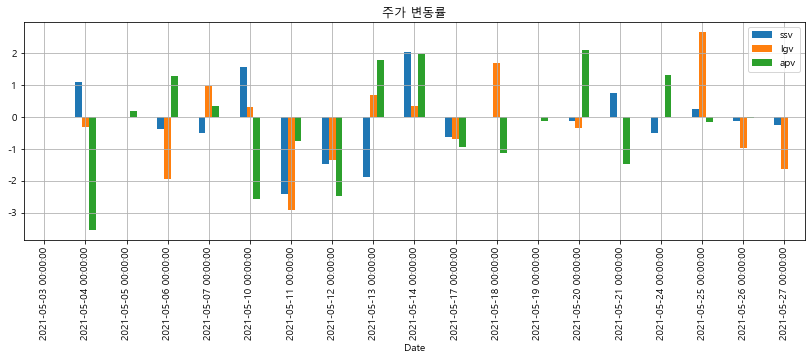

In [25]:
myplot(df[[ 'ssv', 'lgv', 'apv']], kind='bar', title='주가 변동률')


                 ssv       lgv       apv
Date                                    
2021-05-03  0.000000  0.000000  0.000000
2021-05-04  1.101591 -0.322581 -3.538554
2021-05-05  1.101591 -0.322581 -3.343013
2021-05-06  0.738395 -2.264328 -2.062763
2021-05-07  0.252368 -1.274229 -1.700500


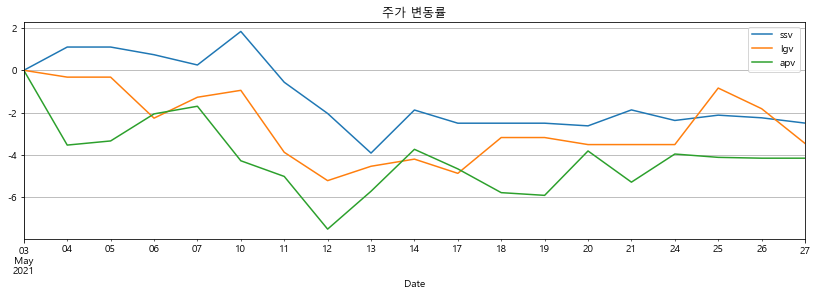

In [26]:
myplot(df[[ 'ssv', 'lgv', 'apv']].cumsum(), title='주가 변동률')


In [27]:
df.to_excel("data.xlsx")